In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chocolate-sales/Chocolate Sales.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [4]:
df = pd.read_csv('/kaggle/input/chocolate-sales/Chocolate Sales.csv')
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [5]:
df.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount',
       'Boxes Shipped'],
      dtype='object')

In [6]:
# Check data info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB
None


In [7]:
# Check missing values
print(df.isnull().sum())

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64


In [8]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Encode categorical columns (Sales Person, Country, Product)
le = LabelEncoder()
for col in ['Sales Person', 'Country', 'Product']:
    df[col] = le.fit_transform(df[col])

In [9]:
# Define features (X) and target (y)
X = df[['Sales Person', 'Country', 'Product', 'Boxes Shipped']]
y = df['Amount']

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

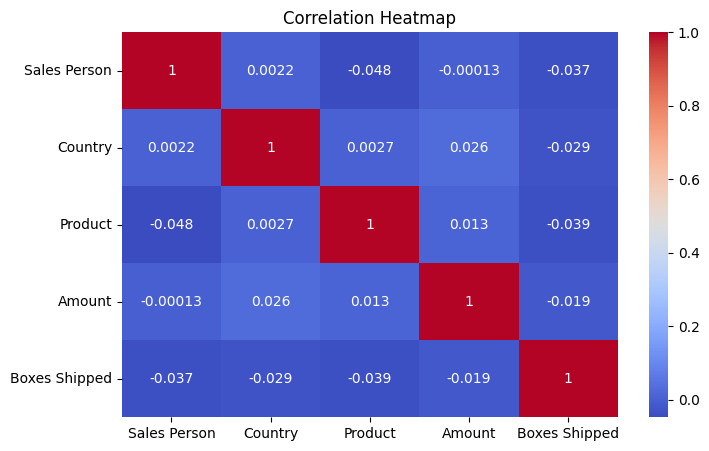

In [11]:
# Clean 'Amount' column: remove $ and commas, convert to float
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

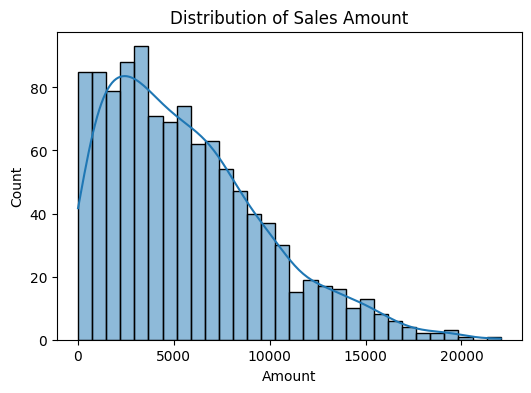

In [12]:
# Sales Amount Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title('Distribution of Sales Amount')
plt.show()

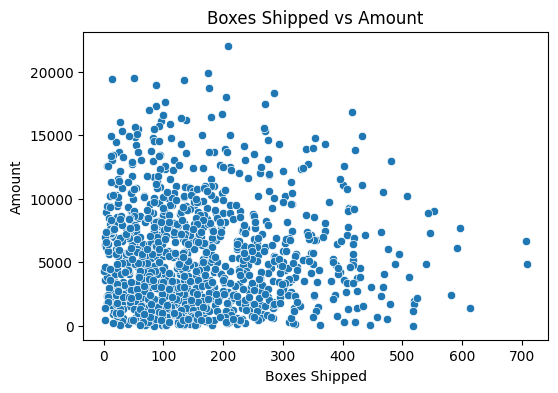

In [13]:
# Boxes Shipped vs Amount
plt.figure(figsize=(6,4))
sns.scatterplot(x='Boxes Shipped', y='Amount', data=df)
plt.title('Boxes Shipped vs Amount')
plt.show()

In [14]:
# Handle Date column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert to datetime
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df = df.drop('Date', axis=1)  # Drop original Date column

In [15]:
# Clean Amount column
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)

In [16]:
# Split features and target
X = df.drop('Amount', axis=1)
y = df['Amount']

In [17]:
# Convert categorical columns to numeric
X = pd.get_dummies(X, drop_first=True)

In [18]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Define models and train (same as before)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42)
}

results = {}
best_model = None
best_score = -999

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    score = r2_score(y_test, preds)
    results[name] = score
    print(f"{name}: R2 Score = {score:.4f}")
    
    if score > best_score:
        best_score = score
        best_model = model

print("\nBest Model:", best_model.__class__.__name__, "with R2 Score =", best_score)

LinearRegression: R2 Score = -0.0143
RandomForest: R2 Score = -0.0960
GradientBoosting: R2 Score = -0.0787

Best Model: LinearRegression with R2 Score = -0.01432531454050423


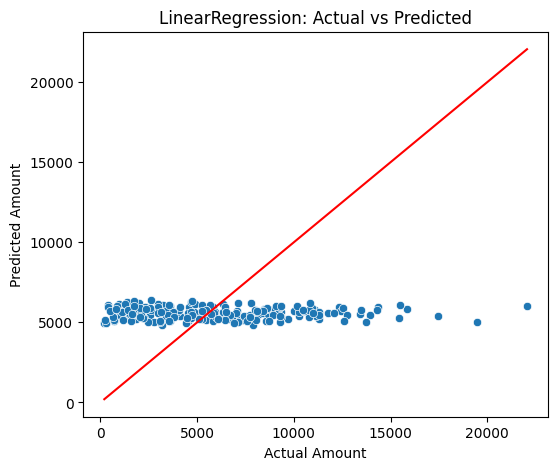

In [20]:
# Predictions from best model
y_pred = best_model.predict(X_test)

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Amount')
plt.ylabel('Predicted Amount')
plt.title(f'{best_model.__class__.__name__}: Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red') # perfect line
plt.show()